# Introduction

Di section ini, kita akan mempelajari cara membuat peta untuk berbagai tujuan. Untuk melakukannya, kita akan berpisah dengan Matplotlib dan bekerja dengan pustaka visualisasi Python lain, yaitu Folium. Keuntungan dari Folium adalah bahwa Folium dikembangkan dengan tujuan untuk memvisualisasikan data geospasial. Meskipun pustaka lain tersedia untuk memvisualisasikan data geospasial, seperti plotly, pustaka tersebut mungkin memiliki batasan pada berapa banyak panggilan API yang dapat kalian lakukan dalam kerangka waktu yang ditentukan. Folium, di sisi lain, sepenuhnya gratis.

# Exploring Datasets with pandas and Matplotlib

Toolkit: Section ini sangat bergantung pada pandas dan Numpy untuk data wrangling, analysis, dan visualization. Perpustakaan plotting utama yang akan kita jelajahi di section ini adalah Folium.

Datasets:

    1. San Francisco Police Department Incidents for the year 2016 - Police Department Incidents from San Francisco public data portal. Incidents derived from San Francisco Police Department (SFPD) Crime Incident Reporting system. Updated daily, showing data for the entire year of 2016. Address and location has been anonymized by moving to mid-block or to an intersection.

    2. Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries - The 2015 revision from United Nation's website. The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. For this lesson, we will focus on the Canadian Immigration data

# Downloading and Preping Data

In [2]:
# Import Primary Modules:

import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt
from PIL import Image # converting images into arrays

# Introduction to Folium

Folium adalah pustaka Python andal yang membantu kalian membuat beberapa jenis peta Leaflet. Fakta bahwa hasil Folium bersifat interaktif membuat perpustakaan ini sangat berguna untuk pembuatan dasbor.

Dari halaman dokumentasi resmi Folium:

    Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

    Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

    The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

Let's install Folium

Folium tidak tersedia secara default. Jadi, kita harus menginstalnya terlebih dahulu sebelum dapat mengimpornya.

In [3]:
# !conda install -c conda-forge folium=0.5.0 --yes
# %pip install folium
import folium

print('Folium installed and imported')

Folium installed and imported


Membuat peta dunia sangat mudah di Folium. Kalian cukup membuat objek Map Folium dan kemudian menampilkannya. Hal yang menarik dari peta Folium adalah peta tersebut interaktif, sehingga kalian dapat memperbesar setiap wilayah yang diinginkan meskipun pada tingkat zoom awal.

In [4]:
# define the world map
world_map = folium.Map()

# display world map
world_map

Coba perbesar dan perkecil peta yang dirender di atas.

Kalian dapat menyesuaikan definisi default peta dunia ini dengan menentukan pusat peta kalian dan tingkat zoom awal.

Semua lokasi di peta ditentukan oleh nilai Lintang dan Bujurnya masing-masing. Jadi kalian dapat membuat peta dan melewati di tengah nilai Lintang dan Bujur [0, 0].

Untuk pusat yang ditentukan, kalian juga dapat menentukan tingkat zoom awal ke lokasi itu saat peta dirender. Semakin tinggi tingkat zoom peta semakin diperbesar ke tengah.

Mari buat peta yang berpusat di sekitar Semarang dan mainkan dengan tingkat zoom untuk melihat bagaimana pengaruhnya terhadap peta yang dibuat.

In [5]:
# define the world map centered around Semarang with a low zoom level
world_map = folium.Map(location=[-6.992620, 110.428099],
                        zoom_start=8)

# display world map
world_map

Mari buat peta lagi dengan tingkat zoom yang lebih tinggi

In [6]:
# define the world map centered around Semarang with a higher zoom level
world_map = folium.Map(location=[-6.992620, 110.428009],
                        zoom_start=11)

# define world_map
world_map

Seperti yang kalian lihat, semakin tinggi tingkat zoom peta semakin diperbesar ke pusat yang diberikan.

    Question: Create a map of Hacktiv8 with a zoom level of 15

In [7]:
### type your answer here
world_map = folium.Map(location=[-6.2607187, 106.7794275],
                        zoom_start=15)

# display world map
world_map

    Fitur keren lainnya dari Folium adalah kalian dapat menghasilkan gaya peta yang berbeda.

## A. Stamen Toner Maps

Stamen Toner adalah peta B+W (hitam dan putih) dengan kontras tinggi. Stamen Toner sempurna untuk data mashup dan menjelajahi kelokan sungai/river meanders dan zona pesisir/coastal zones.

Mari buat peta Stamen Toner Semarang dengan tingkat zoom 13.

In [8]:
# create a Tamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.9902851, 110.4207485],
                        zoom_start=13,
                        tiles='Stamen Toner')

# display map
world_map

Jangan ragu untuk memperbesar dan memperkecil peta untuk melihat bagaimana gaya ini dibandingkan dengan gaya default.

## B. Stamen Terrain Maps

Stamen Terrain adalah peta yang menampilkan bayangan bukit dan warna vegetasi alami. Stamen Terrain menampilkan pelabelan lanjutan dan generalisasi garis dari jalan dengan dua jalur.

Mari buat peta Stamen Terrain Semarang dengan tingkat zoom 13.

In [9]:
# dreate a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.9902851, 110.4207485],
                        zoom_start=13,
                        tiles='Stamen Terrain')

# display map
world_map

Jangan ragu untuk memperbesar dan memperkecil peta untuk melihat bagaimana gaya ini dibandingkan dengan gaya default.

# Maps with Markers

Mari unduh dan mengimpor data police department incidents menggunakan method pandas read_csv().

In [10]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


Mari kita lihat lima item pertama dalam dataset kita.

In [11]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


    Jadi setiap baris terdiri dari 13 fitur:

    1. IncidntNum: Incident Number
    2. Category: Category of crime or incident
    3. Descript: Description of the crime or incident
    4. DayOfWeek: The day of week on which the incident occurred
    5. Date: The Date on which the incident occurred
    6. Time: The time of day on which the incident occurred
    7. PdDistrict: The police department district
    8. Resolution: The resolution of the crime in terms whether the perpetrator was arrested or not
    9. Address: The closest address to where the incident took place
    10. X: The longitude value of the crime location
    11. Y: The latitude value of the crime location
    12. Location: A tuple of the latitude and the longitude values
    13. PdId: The police department ID

Mari kita cari tahu berapa banyak entri di kumpulan data kita.

In [12]:
df_incidents.shape

(150500, 13)

Jadi dataframe kita terdiri dari 150.500 kejahatan, yang terjadi pada tahun 2016. Untuk mengurangi computational cost, mari kita bekerja dengan hanya 100 insiden pertama dalam kumpulan data ini.

In [13]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

Mari kita konfirmasikan bahwa dataframe kita sekarang hanya terdiri dari 100 kejahatan.

In [14]:
df_incidents.shape

(100, 13)

Sekarang setelah kita sedikit mengurangi datanya, mari kita visualisasikan dimana kejahatan terjadi di kota San Francisco. Kita akan menggunakan gaya default dan kita akan menginisialisasi tingkat zoom ke 12.

In [15]:
# San Fransisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [16]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Fransisco
sanfran_map

Sekarang mari kita taruh lokasi kejahatan ke dalam peta. Cara untuk melakukannya di Folium adalah dengan membuat feature group dengan fitur dan gayanya sendiri, lalu menambahkannya ke sanfran_map.

In [17]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat,lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6

        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

Kalian juga dapat menambahkan beberapa teks pop-up yang akan ditampilkan saat kalian mengarahkan kursor ke atas marker. Mari buat setiap penanda menampilkan kategori kejahatan saat diarahkan ke atas marker.

In [18]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat,lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6

        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat,lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

# add incidents to map
sanfran_map.add_child(incidents)

Sekarang kita dapat mengetahui kategori kejahatan apa yang terjadi di setiap marker.

Jika kalian menyadari peta menjadi sangat padat akan semua marker ini, ada dua solusi untuk masalah ini. Solusi yang lebih sederhana adalah dengan menghapus marker lokasi ini dan menambahkan teks ke marker lingkaran itu sendiri sebagai berikut:

In [19]:
# create map ands display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you wantthe circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

Solusi lain yang tepat adalah dengan mengelompokkan marker ke dalam cluster yang berbeda. Setiap cluster kemudian diwakili oleh jumlah kejahatan di setiap lingkungan. Cluster ini dapat dianggap sebagai kantong dari kejahatan San Francisco yang kemudian dapat kalian analisis secara terpisah.

Untuk mengimplementasikannya, kita mulai dengan membuat instance objek MarkerCluster dan menambahkan semua titik data di dataframe ke objek ini.

In [20]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location=[latitude, longitude],
                        zoom_start=12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to he mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X,
df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

Perhatikan bagaimana saat kalian memperkecil sepenuhnya, semua marker dikelompokkan ke dalam satu cluster, cluster global, dari 100 marker atau kejahatan, yang merupakan jumlah total kejahatan dalam dataframe kita. Setelah kalian mulai memperbesar, cluster global akan mulai dibagi menjadi beberapa cluster yang lebih kecil. Memperbesar sepenuhnya akan menghasilkan marker individual.

# Choropleth Maps

Peta Choropleth adalah peta tematik di mana area diarsir atau berpola sebanding dengan pengukuran variabel statistik yang ditampilkan di peta, seperti kepadatan penduduk atau pendapatan per kapita. Peta choropleth memberikan cara mudah untuk memvisualisasikan bagaimana suatu pengukuran bervariasi di seluruh wilayah geografis atau menunjukkan tingkat variabilitas dalam suatu wilayah. Di bawah ini adalah peta Choropleth AS yang menggambarkan populasi dengan mil persegi per negara bagian.

In [21]:
# save mask to Choroleth_AS
Choropleth_AS = np.array(Image.open('2000_census_population_density_map_by_state.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


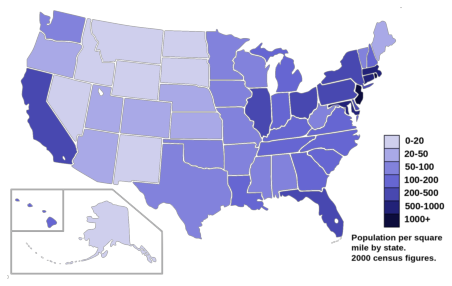

In [22]:
fig = plt.figure()
fig.set_figwidth(10) #set width
fig.set_figheight(5) # set height

plt.imshow(Choropleth_AS, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Sekarang, mari buat peta Choropleth dunia kita sendiri yang menggambarkan imigrasi dari berbagai negara ke Canada.

Pertama-tama, unduh dan impor kumpulan data imigrasi Kanada utama kita sebelumnya menggunakan metode pandas read_excel(). Biasanya, sebelum kita bisa melakukannya, kita perlu mengunduh modul yang dibutuhkan panda untuk dibaca di file excel. Modul ini xlrd.

In [23]:
# !conda install -c anaconda xlrd --yes

In [24]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Mari kita lihat lima item pertama dalam dataset kita.

In [25]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Mari kita cari tahu berapa banyak entri di kumpulan data kita

In [26]:
# print the dimensins of the dataframe
print(df_can.shape)

(195, 43)


Bersihkan data. Kita akan melakukan beberapa modifikasi pada dataset asli untuk mempermudah pembuatan visualisasi kita. Lihat Basic Visualization, Line plots and Area Plots, Histograms, dan Bar Plots untuk penjelasan rinci tentang preprocessing ini.

In [27]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 39)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9280\945820893.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


Mari kita lihat lima item pertama dari kerangka data yang telah dibersihkan.

In [28]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Untuk membuat peta Choropleth, kita membutuhkan file GeoJSON yang mendefinisikan area / batas negara bagian, kabupaten, atau negara yang kita minati. Dalam kasus kita, karena kita berusaha untuk membuat peta dunia, kita menginginkan sebuah GeoJSON yang mendefinisikan batas-batas semua negara dunia. Unduh file GeoJSON terlebih dahulu.

In [29]:
# download countries geojson file
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


Sekarang setelah kita memiliki file GeoJSON, mari buat peta dunia, berpusat di sekitar [0, 0] nilai lintang dan bujur, dengan tingkat zoom awal 2, dan menggunakan gaya Mapbox Bright.

In [34]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0],
                        zoom_start=2,
                        tiles="Stamen Terrain")

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', # Yellow, Orange, Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

c:\anaconda\lib\site-packages\folium\folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
